<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/tmd_wheelchair/June_10sec_rand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = np.load('/content/drive/MyDrive/TMD_data/train_10s_data.npy')
train_label = np.load('/content/drive/MyDrive/TMD_data/train_10s_label.npy')

val_data = np.load('/content/drive/MyDrive/TMD_data/valid_10s_data.npy')
val_label= np.load('/content/drive/MyDrive/TMD_data/valid_10s_label.npy')

In [4]:
data = np.concatenate([train_data, val_data])
label = np.concatenate([train_label, val_label])
del train_data
del val_data
del train_label
del val_label

np.save("/content/drive/MyDrive/full_data_10sec", data)
np.save("/content/drive/MyDrive/full_label_10sec", label)

In [3]:
data = np.load('/content/drive/MyDrive/full_data_10sec.npy')
label = np.load('/content/drive/MyDrive/full_label_10sec.npy')

In [4]:
# random sampling
from sklearn.model_selection import train_test_split

train_data, val_data, train_label, val_label = train_test_split(data, label, test_size=0.2, shuffle=True, stratify=label, random_state=34)

del data
del label

In [5]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(10556, 600, 10)
(10556, 7)
(2639, 600, 10)
(2639, 7)


In [ ]:
# CRNN with 3층 GRU
# crnn_gru_3layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

83/83 [==============================] - 1s 6ms/step - loss: 0.1768 - accuracy: 0.9507


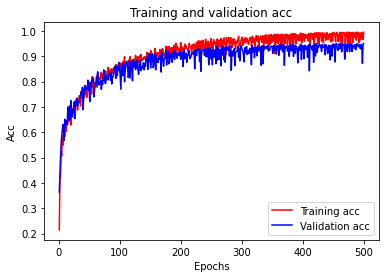

In [9]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/CRNN_GRU_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_3layers
# accuracy: 0.9507
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN cnn층 크게, gru 2층으로
# crnn_gru_2layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=1000,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

83/83 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.9238


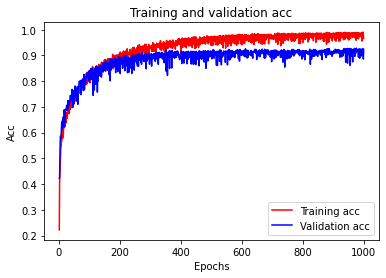

In [13]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/CRNN_GRU_addcnn.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_2layers
# accuracy: 0.9238
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN LSTM
# crnn_lstm_1layer
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             kernel_regularizer=regularizers.l2(0.001),
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             kernel_regularizer=regularizers.l2(0.001)))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(64, kernel_regularizer=regularizers.l2(0.001), dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(learning_rate = 0.0008)

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=2000,
                    batch_size=2048,
                    validation_data = (val_data, val_label))

83/83 [==============================] - 0s 4ms/step - loss: 0.5637 - accuracy: 0.8602


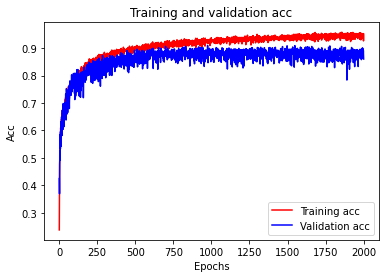

In [17]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/CRNN_LSTM.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_lstm_1layer
# accuracy: 0.8602
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN LSTM lr 감소
# crnn_lstm_3layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0008)

model_crnn.compile(optimizer=rmsprop,
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=2)

83/83 [==============================] - 0s 6ms/step - loss: 0.2135 - accuracy: 0.9469


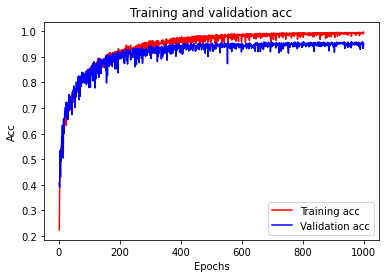

In [19]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/CRNN_LSTM_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_lstm_3layers
# accuracy: 0.9469
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 3층 1D CNN 
# 1Dcnn_3layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(64, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

83/83 [==============================] - 0s 4ms/step - loss: 1.0147 - accuracy: 0.9147


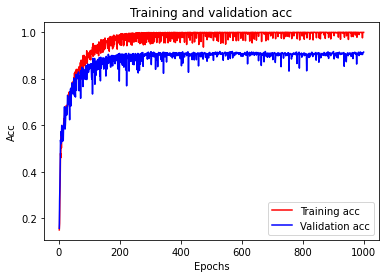

In [7]:
model_cnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/Conv1D.h5')
model_cnn.evaluate(val_data, val_label)

# 1Dcnn_3layers
# accuracy: 0.9147
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 1D CNN 5층 
# 1Dcnn_5layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

83/83 [==============================] - 1s 5ms/step - loss: 0.3873 - accuracy: 0.9174


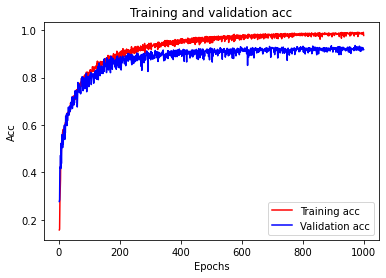

In [9]:
model_cnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/Conv1D_5layers.h5')
model_cnn.evaluate(val_data, val_label)

# 1Dcnn_5layers
# accuracy: 0.9174
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN with 5층 GRU
# crnn_gru_5layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))

model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))

model_crnn.add(layers.Dropout(0.5))

model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(128, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

83/83 [==============================] - 1s 8ms/step - loss: 0.2003 - accuracy: 0.9492


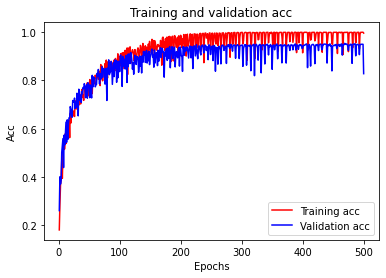

In [18]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec_rand/crnn_GRU_5layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_5layers
# accuracy: 0.9492
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()